In [34]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [36]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

# 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

500 [57.39479705  5.10767868  2.46037345  4.08674902] 39.98166412253417
1000 [57.39713005  5.765859    1.85689028  4.03893236] 39.80723120406399
1500 [57.39713014  5.99060723  1.60529698  4.06885866] 39.78240504280036
2000 [57.39713014  6.07152025  1.50155606  4.09300748] 39.778523565788916
2500 [57.39713014  6.10185559  1.45905205  4.10572941] 39.777887486171274
3000 [57.39713014  6.11355928  1.44170275  4.11160375] 39.77777930470262
3500 [57.39713014  6.11816175  1.43463681  4.11416107] 39.77775983405892
4000 [57.39713014  6.11999396  1.43176283  4.1152412 ] 39.77775594321602
4500 [57.39713014  6.12072893  1.43059479  4.11568989] 39.777755024514185
5000 [57.39713014  6.12102515  1.4301203   4.11587451] 39.77775476050768


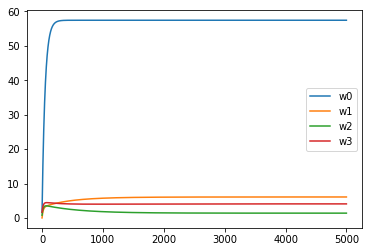

In [58]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        w_list.append(W.copy())
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])\

X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

w_list = []

eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
w_list = np.array(w_list)

plt.plot(w_list)
plt.legend(['w0', 'w1', 'w2', 'w3'])



# 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Стандартизация и нормализация не противоречат друг другу, их можно применять вместе на одном признаке.

# 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [38]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W